In [1]:
from transformers import CLIPModel, CLIPProcessor
from datasets import load_dataset
from PIL import Image
import torch

/home/siddhesh1793/anaconda3/envs/clip_classifier/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "laion/CLIP-ViT-H-14-laion2B-s32B-b79K"

In [3]:
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name).to("cuda")

In [4]:
dataset = load_dataset("imagenet-1k")

Found cached dataset imagenet-1k (/home/siddhesh1793/.cache/huggingface/datasets/imagenet-1k/default/1.0.0/a1e9bfc56c3a7350165007d1176b15e9128fcaf9ab972147840529aed3ae52bc)
100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


In [7]:
inp = torch.load("imagenet1k_clip_embeddings/train/1.pt")

In [8]:
classes = dataset['train'].features['label'].names

In [9]:
image_idx = 60

In [10]:
label = inp['labels'][image_idx].cpu().item()
image = inp['images'][image_idx].permute([1, 2, 0])
embed = inp['embeddings'][image_idx]
text_class = classes[label]
image = ( image - image.min() ) / (image.max() - image.min())
image *= 255

IndexError: index 60 is out of bounds for dimension 0 with size 1

In [ ]:
text_class

'oystercatcher, oyster catcher'

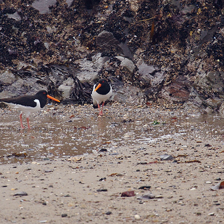

In [ ]:
from PIL import Image
pil_image = Image.fromarray(image.numpy().astype('uint8'))
pil_image

In [ ]:
texts = [f"A photo of {class_name}" for class_name in classes]

with torch.no_grad():
    text_embeddings = torch.zeros([1000, 1024]).to('cuda')
    for idx, text in enumerate(texts):
        inputs = processor(text=texts[idx], return_tensors="pt")
        inputs['input_ids'] = inputs['input_ids'].to('cuda')
        inputs['attention_mask'] = inputs['attention_mask'].to('cuda')

        text_embeddings[idx] = model.get_text_features(**inputs)[0]

In [ ]:
embed = embed.to('cuda')
dot_prod = torch.matmul(text_embeddings, embed)

In [ ]:
embed.shape

NameError: name 'embed' is not defined

In [ ]:
classes[dot_prod.argmax().cpu().item()]

'oystercatcher, oyster catcher'